In [34]:
from utilities import *
import math
import numpy as np
import matplotlib.pyplot as plt
import argparse
import time

In [35]:
# Data and parameters
split_allowed = True
n_experiments = 150
T = 365
n_arms = 20
price_min = 500
price_max = 700
clicks = {1 : 50, 2 : 50, 3 : 50}
n_users = sum(clicks.values())
delta_price = price_max - price_min
prices = np.linspace(price_min, price_max, n_arms)
conversion_rate = {
	1: (lambda x: 10*(6*((x-price_min)*2/delta_price) - ((x-price_min)*2/delta_price)**2 - ((x-price_min)*2/delta_price)**3)/(38*math.sqrt(19)-56)*0.65),
	2: (lambda x: (((x-price_min)/delta_price)**2 + 3*((x-price_min)/delta_price) - 4*(((x-price_min)/delta_price)**4))/2),
	#2: (lambda x: 20*(6*((x-price_min)*2/delta_price) - ((x-price_min)*2/delta_price)**2 - ((x-price_min)*2/delta_price)**3)/(38*math.sqrt(19)-56)*0.65),
	3: (lambda x: 0.7 - 0.3*(x - price_min)/delta_price)
    #3: (lambda x: 15*(6*((x-price_min)*2/delta_price) - ((x-price_min)*2/delta_price)**2 - ((x-price_min)*2/delta_price)**3)/(38*math.sqrt(19)-56)*0.65)
	#3: (lambda x: 0.8+math.sin((x-price_min)/(math.pi*delta_price))**2)
}
static = True
if static:
    context_probabilities = {sc : clicks[sc]/n_users for sc in [1,2,3]} #static probabilities
else:
    context_probabilities = {sc : 0 for sc in [1,2,3]}
opt = {i : max([conversion_rate[i](arm)*arm*clicks[i] for arm in prices]) for i in [1,2,3]} #clairvoyant rewards

Text(0.5, 1.0, 'Expected Rewards')

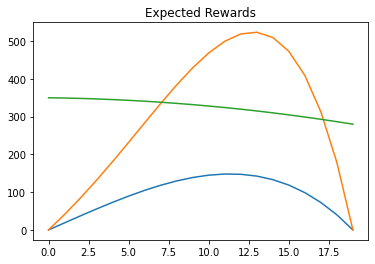

In [36]:
plt.plot([conversion_rate[1](i)*i for i in prices])
plt.plot([conversion_rate[2](i)*i for i in prices])
plt.plot([conversion_rate[3](i)*i for i in prices])
plt.title('Expected Rewards')

In [ ]:
all_rewards = {e : {t : {1 : 0, 2 : 0, 3 : 0} for t in range(T)} for e in range(n_experiments)}
split_times = []
new_contexts = []
rightsplit= 0
for e in range(n_experiments):
    print('Experiment '+str(e))
    contexts = {'A' : [1,2,3]}
    environments = dict()
    learners = dict()
    environments.update({'A' : PricingEnvironment([1,2,3], prices, conversion_rate)})
    learners.update({'A' : TS_Learner([1,2,3],n_arms, -1)})
    for t in range(T):
        contexts, learners, environments = update_contexts(new_contexts, contexts, learners, environments, n_arms, prices, context_probabilities, conversion_rate, t-1)
        for c in contexts:
            learners[c].update_status()
            pulled_arm = learners[c].pull_arm()
            for sc in contexts[c]:
                buyers = 0
                for nc in range(clicks[sc]):
                    reward = environments[c].round(pulled_arm, sc) # customer buys -> reward = 1, 0 otherwise
                    buyers += reward
                    learners[c].update(pulled_arm, reward, prices[pulled_arm], sc)
                all_rewards[e][t][sc] += learners[c].collected_rewards[t][sc]
                learners[c].update_users_per_arm(pulled_arm, sc, buyers)
            new_contexts = []
            if (t+1)%7 == 0 and t and len(contexts[c]) > 1 and split_allowed:  ## WEEKEND
                best, best_total = learners[c].best_performance()
                if not static:
                    context_probabilities = learners[c].compute_dynamic_probabilities(best, clicks)
                new_contexts = is_split(contexts[c], best, best_total, context_probabilities)
                if new_contexts:
                    split_times.append(t)
                    print('Splitted Context '+c+ ' at time '+str(t+1))

Experiment 0
Splitted Context A at time 7
{'B': [3], 'C': [1, 2]}
Splitted Context C at time 14
{'B': [3], 'D': [1], 'E': [2]}
Experiment 1
Splitted Context A at time 7
{'B': [3], 'C': [1, 2]}
Splitted Context C at time 14
{'B': [3], 'D': [1], 'E': [2]}
Experiment 2
Splitted Context A at time 7
{'B': [1], 'C': [2, 3]}
Splitted Context C at time 14
{'B': [1], 'D': [2], 'E': [3]}
Experiment 3
Splitted Context A at time 7
{'B': [1], 'C': [2, 3]}
Splitted Context C at time 14
{'B': [1], 'D': [2], 'E': [3]}
Experiment 4
Splitted Context A at time 7
{'B': [3], 'C': [1, 2]}
Splitted Context C at time 14
{'B': [3], 'D': [1], 'E': [2]}
Experiment 5
Splitted Context A at time 7
{'B': [3], 'C': [1, 2]}
Splitted Context C at time 14
{'B': [3], 'D': [1], 'E': [2]}
Experiment 6
Splitted Context A at time 7
{'B': [1], 'C': [2, 3]}
Splitted Context C at time 14
{'B': [1], 'D': [2], 'E': [3]}
Experiment 7
Splitted Context A at time 7
{'B': [3], 'C': [1, 2]}
Splitted Context C at time 14
{'B': [3], 'D':

Experiment 65
Splitted Context A at time 7
{'B': [3], 'C': [1, 2]}
Splitted Context C at time 28
{'B': [3], 'D': [1], 'E': [2]}
Experiment 66
Splitted Context A at time 7
{'B': [3], 'C': [1, 2]}
Splitted Context C at time 21
{'B': [3], 'D': [1], 'E': [2]}
Experiment 67
Splitted Context A at time 7
{'B': [2], 'C': [1, 3]}
Splitted Context C at time 14
{'B': [2], 'D': [1], 'E': [3]}
Experiment 68
Splitted Context A at time 7
{'B': [2], 'C': [1, 3]}
Splitted Context C at time 14
{'B': [2], 'D': [1], 'E': [3]}
Experiment 69
Splitted Context A at time 7
{'B': [2], 'C': [1, 3]}
Splitted Context C at time 14
{'B': [2], 'D': [1], 'E': [3]}
Experiment 70
Splitted Context A at time 7
{'B': [3], 'C': [1, 2]}
Splitted Context C at time 21
{'B': [3], 'D': [1], 'E': [2]}
Experiment 71
Splitted Context A at time 7
{'B': [3], 'C': [1, 2]}
Splitted Context C at time 14
{'B': [3], 'D': [1], 'E': [2]}
Experiment 72
Splitted Context A at time 7
{'B': [3], 'C': [1, 2]}
Splitted Context C at time 14
{'B': [

In [ ]:
plt.plot([sum([all_rewards[e][t][1] for e in range(n_experiments)])/n_experiments for t in range(T)])
plt.plot([sum([all_rewards[e][t][2] for e in range(n_experiments)])/n_experiments for t in range(T)])
plt.plot([sum([all_rewards[e][t][3] for e in range(n_experiments)])/n_experiments for t in range(T)])
plt.axhline(opt[1])
plt.axhline(opt[2])
plt.axhline(opt[3])
plt.title('Instantaneous Rewards for Subcampaigns')

In [ ]:
plt.plot([sum([sum([all_rewards[e][t][sc] for sc in [1,2,3]]) for e in range(n_experiments)])/n_experiments for t in range(T)])
plt.axhline(opt[1]+opt[2]+opt[3])
plt.title('Instantaneous Rewards Total')

In [ ]:
plt.plot(opt[1]-[sum([all_rewards[e][t][1] for e in range(n_experiments)])/n_experiments for t in range(T)])
plt.plot(opt[2]-[sum([all_rewards[e][t][2] for e in range(n_experiments)])/n_experiments for t in range(T)])
plt.plot(opt[3]-[sum([all_rewards[e][t][3] for e in range(n_experiments)])/n_experiments for t in range(T)])
plt.axhline(0)
plt.title('Instantaneous Regrets for Subcampaigns')

In [ ]:
plt.plot(sum([opt[sc]for sc in [1,2,3]])-[sum([sum([all_rewards[e][t][sc] for sc in [1,2,3]]) for e in range(n_experiments)])/n_experiments for t in range(T)])
plt.axhline(0)
plt.title('Instantaneous Regrets for Subcampaigns')

In [ ]:
plt.plot(np.cumsum(opt[1]-[sum([all_rewards[e][t][1] for e in range(n_experiments)])/n_experiments for t in range(T)]))
plt.plot(np.cumsum(opt[2]-[sum([all_rewards[e][t][2] for e in range(n_experiments)])/n_experiments for t in range(T)]))
plt.plot(np.cumsum(opt[3]-[sum([all_rewards[e][t][3] for e in range(n_experiments)])/n_experiments for t in range(T)]))
plt.title('Cumulative Regrets for Subcampaigns')

In [ ]:
plt.plot(np.cumsum(sum([opt[sc] for sc in [1,2,3]])-[sum([sum([all_rewards[e][t][sc] for sc in [1,2,3]]) for e in range(n_experiments)])/n_experiments for t in range(T)]))
plt.title('Cumulative Regrets Total')